<a href="https://colab.research.google.com/github/JackyLiu13/learningML/blob/main/00_pytorch_fundamentals_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Dec 29 23:26:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 00 pytorch fundamenta;s
resource: https://www.learnpytorch.io/00_pytorch_fundamentals/


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.5.1+cu121


#Intro to Tensors
##creating tensors

pytorch tesnors are created using torch.tensor()

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
#scalar.ndim
scalar.item()

7

In [ ]:
# vector -- has magnitude and direction
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape
# 2 by 1 elements

torch.Size([2])

In [ ]:
# MATRIX
MATRIX = torch.tensor([[7,8],[9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[1]

tensor([ 9, 10])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3],[3,6,9],[2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

# Random Tensors
why random tensors
random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

`start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`


In [ ]:
# create a random tensor of the size (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.2721, 0.7471, 0.4971, 0.8662],
        [0.7232, 0.6199, 0.0889, 0.7627],
        [0.9857, 0.2788, 0.6830, 0.9967]])

In [ ]:
random_tensor.ndim

2

In [ ]:
# example of an image tensor
random_img_size_tensor = torch.rand(size=(3,224,224))
random_img_size_tensor.shape, random_img_size_tensor.ndim

(torch.Size([3, 224, 224]), 3)

In [ ]:
# zero tensor
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# ones tensor
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# range torch
one_to_ten = torch.arange(start=1,end=11, step= 2)
one_to_ten

tensor([1, 3, 5, 7, 9])

In [ ]:
# data types # can also be on cuda
# devices for fast and slow computes between cpu and cuda
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype=None,
                               device="cpu",
                               requires_grad=False)
float_32_tensor

tensor([3., 6., 9.])

# Linear Regression
Data can be almost anything... in machine learning
* excel spreadsheet
* images of any kind
* videos (yt has a lot of data...)
* uadio like songs or podcasts
* dna
* text

machine learning is a game of two parts:
1. get data into a numerical representation
2. build a model to learn patterns in numberical representation.

to showcase this, lets create some *known* data using linear regression formujla.

we'll use a linear regression formula to make a straight line with *known* **parameters**. (parameter is something the model learns)



In [ ]:
# create *known* parameters
weight = 0.7
bias = 0.3

# linear function: y = a + bx ~ weight = b; bias = a

# create
start =0
end = 1
step = 0.02

# INPUT
X = torch.arange(start,end,step).unsqueeze(dim=1) #capital = tensor / matrix; unsqueeze adds extra dimensions
# OUTPUT
# y = bX + a
y = weight * X + bias
# ML ~ learn the representation of the input; and how it maps to the output
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

# spliting data into training and test sets
~ ( one of the most important concepts in machine learning in general )

## Three Datasets
### Uni Analogy
* Training set - Course MAterials
* Validation Set - Practice Exam
* Test Set - Final Exam

The model first learns from the training sets, learning the patterns. Then to practice it goes through the validation set; think of doing exam practice. The model will be tuned into the practice set; we adjust the model by retraining on the training set and then test it again on the validation set. Finally the test set is where the model is checking if it is ready for the wild.

### Generalization
* the ability for a machine learning model to perform well on data it hasn't seen before


### Data split
* Training set ~ 60-80% Always needed
* Validation set ~ 10-20% Often used but not always
* Training 10-20% Always needed

In [ ]:
#create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# side note: popular set training is just sklearn ~ adds randomness?
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?
this is where the data explorer's motto comes in
"Visualize,Visualize,Visualize!"

In [ ]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
  """
  plot training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue ~ c is color, b is blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  # plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  # are there predictions?
  if predictions is not None:
    # plot predictions in red
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # show the legend
  plt.legend(prop={"size":14})


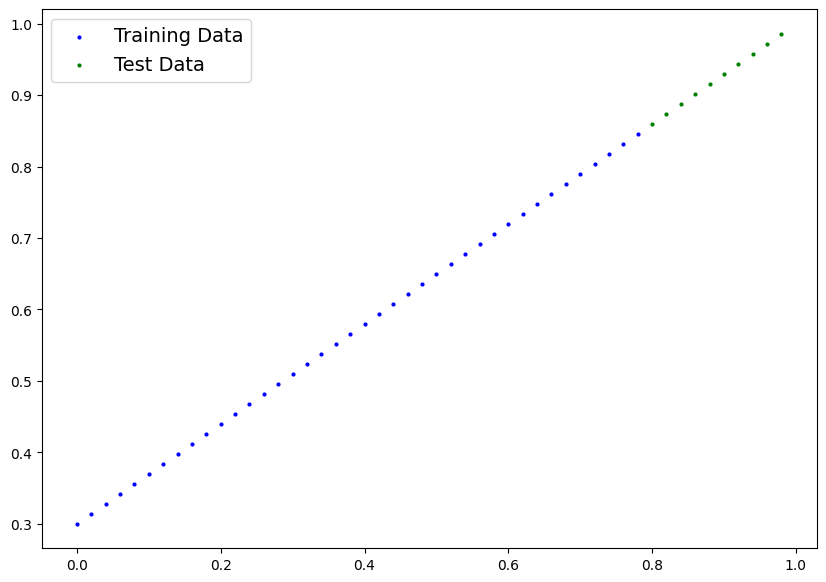

In [ ]:
plot_predictions()

going to model to learn the blue dots; blue dot is input; green is ideal output

we know the relationship between x and y; we set up using the weight and bias with the linear regression formula.

# Linar regression formula
first pytorch linear regression

## What does our model does:
* start with random values (weight and bias)
* look at training data and adjust the random values to better represent (or get closer ) to the ideal values ( the weight and bias values we used to create the data )

## How does it do so?

Through two main algorithmns:
* Gradient Descent
* Back propagation

In [ ]:
from torch import nn
# building model
# create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in pytorch inherits nn module
  """
  linear regression model class
  """
  def __init__(self):
    super().__init__()
    # initialize model parameters; used in various computations (These could be different layers from torch.nn, single parameters, hard-coded values or functions)


    self.weights = nn.Parameter(torch.randn(1, # <-start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- this menas pytoch ill track the gradients of this specific paramter for use with torch.autograd and gradient descent (for many torch.nn modules, requires_grad=True is set by default)
                                            dtype=torch.float)) # <- pytorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent
                                         dtype=torch.float))

  # Forward Method to define the computation in the model
  # forward ~ any sub class of nn.Module needs to override forward() ; (this defines the forward copmution of the model)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # Linear regression formula y = mx + b



## Pytorch model building essentials

* torch.nn -- contains all the building blocks for computational graphs ( a neural network can be consider a computational graph)
* torch.nn.Parameter - what parameters should  our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorhc live, they will help with the gradient descent
* def forward() All nn.module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation

# Checking the contents of our PyTorch Model
now we've created a module, let's see what's inside...
so we can check our model parameters or what's inside our model using .parameters()

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

## making predictions using `torch.inference_mode()`
* to check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`. when we pass data through our model, it's going to run through the forward() method.


In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# make predictions with model
with torch.inference_mode():
  # inference disables all the useful training things; that means less data is being tracked of
  y_preds = model_0(X_test)

# can also do similar with no_grad, but the inference mode is prefered
# with torch.no_grad():
#   y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

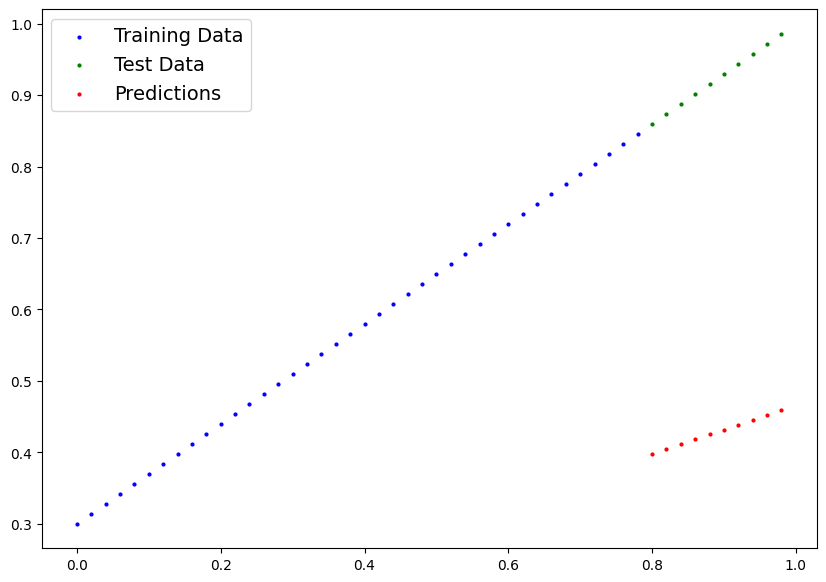

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

# Training Model !
the whole idea of training is for a model to move from some *unknown* parameters (These may be random ) to some *known* parameters

or in other words from a poor represetnation of the data to a better representation of the data.

To measure the representation we can use **LOSS FUNCTION**
~ one way to measure how poor or how wrong your model's predictions are is to use a loss function

* note: loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function


### things we need to train:

* **loss function:** a funciton to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **optimizer**: takes account the loss of a model and adjusts the model's parameters (e.g. weights and bias)
  * inside the optimizer you'll often have to set two parameters:
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameter with each step ( a small `lr` results in small changes, a large `lr` results in large changes )

and specfifically for PyTorch we need:
* a training loop
* a testing loop

( a parameter is a value that the model sets itself versus hyperparameter is human set)




In [ ]:
model_0.state_dict() # <- checks out our model's parameters ( a parameter is a value that the model sets itself versus hyperparameter is human set)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# set up a loss funciton
loss_fn = nn.L1Loss() # MAE

# set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # stochastic gradient descent ; lr = learning rate
                            # possible the most important hyperparameter you can set
                            # 0.01 will change the tenth value (e.g. 0.x3) or 0.1 (e.g. 0.3) or 0.001 (e.g. 0.XX3) [3 being the example value that will have steps ]


## What loss function and optimizer should I use??

This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours) a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SDG()` will suffice.

But for a classifcation problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

## building a training loop and testing loop in pytorch
a couple of things we need in a training loop:
0. loop thru the data
1. forward pass (This involves data moving through our model's `forward()` functions) to make predictions on data - also called **Forward propagation**
2. calculate the loss (compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backwards -- move backwards through network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. optimizer step -- the optimizer to adjust our model's parameters to try and improve the loss (**Gradient descent**)

### What is a gradient?
Change in X and change in Y

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# an epoch is one loop through the data...
epochs = 200

# track different values <- empty lists for storing useful values (helpful for tracking model progression)
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. loops thru the data <- pass the data thru the model for a number of epochs
for epoch in range(epochs):
  # set the model to training mode
  model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients
  # 1. forward pass <- pass the data thru the model; this will perform the forward() method located witin the model object that we wrote with override
  y_pred = model_0(X_train)
  # 2. calculate the loss <- how wrong the predictions are to the true values
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")
  # 3. optimizer zero grad <- zero the optimizer gradients; they accumulate every epoch, zero them to start fresh each forward pass
  optimizer.zero_grad()
  # 4. loss backwards; perform backpropgation on the loss with respect to the paramters of the model
  loss.backward() # <- perfom backpropagation on the loss function (compute the gradient of every paramter with requires_grad=True)
  # 5. optimizer step (perform gradient descent)
  optimizer.step() # by default how optimizer changes will acculmate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  # testing the model
  model_0.eval() # turns off diff settings in the model not needed for evaluation/testing (dropout/batch norms)
  # ^ tells the model we want to evulate rather than train (This turns off functionality used for training but not for evaluation)

  # turns off gradient tracking and a couple more things behind the scenes
  with torch.inference_mode(): # <- turn of torch.inference_mode() context manager to disable functionality such as gradient tracking for inference (Gradeint tracking not needed for inference)
  # ^ fast performance
    #1. do the forward pass <- pass the test data through the model (this will call the mode's implemented forward() method)
    test_pred = model_0(X_test)
    #2. calculate the loss <- calculate the test loss value (how wrong the model's predictions are on the test dataset, lower is better)
    test_loss = loss_fn(test_pred, y_test)

  # displays information outputs for how the model is doing during training/testing every ~ 10 epochs
  if epoch %10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
  print(model_0.state_dict())

loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
loss: 0.20919232070446014
OrderedDict([('w

In [ ]:
import numpy as np

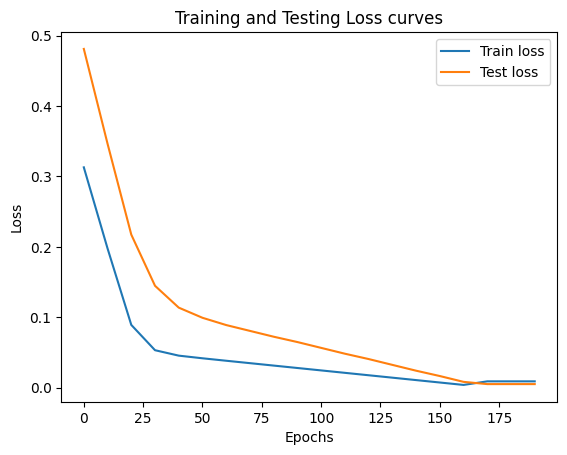

In [ ]:

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Testing Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

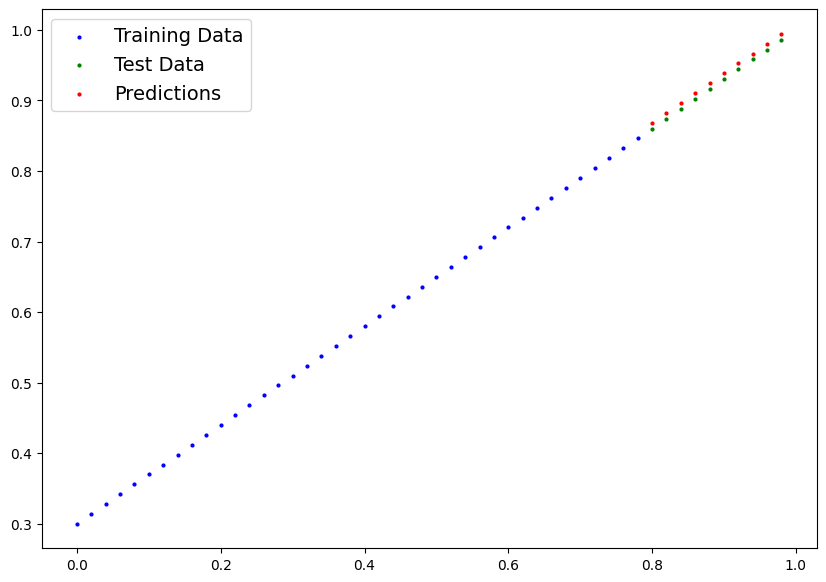

In [ ]:
plot_predictions(predictions=y_preds)

# Saving a model in pytorch

There are three main methods for saving and loading models in pytorch

1. `torch.save()` saves pytorhc object in python's pickle method; binary protocols for serializing and deserializing
2. `torch.load()` allows you to load a saved pytorhc object
3. `torch.n..Module.load_state_dict()` - this allows to load a model's saved state dictionary

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# saving pytorch model

from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth" #pytorch extension is pth; or pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH # THIS IS ONLY THE PATH

# 3. SAVING THE MODEL STATE DICT
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model.pth


## Loading a PyTorch model
since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and `state_dict()` into that.

In [ ]:

## to load into a save state_dict we have to instantiate a new instance of or model class
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<ipython-input-49-211ec92f790d>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# make some predictions with our loaded model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

Create device agnostic code
this means if we've got access to a GPU, our code will use it (for potentially faster compute)
if no GPU is available the code will default to using CPU

In [ ]:
# set up devcie agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using devices: {device}")
device

Using devices: cuda


'cuda'

# 6.1 data

In [ ]:
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

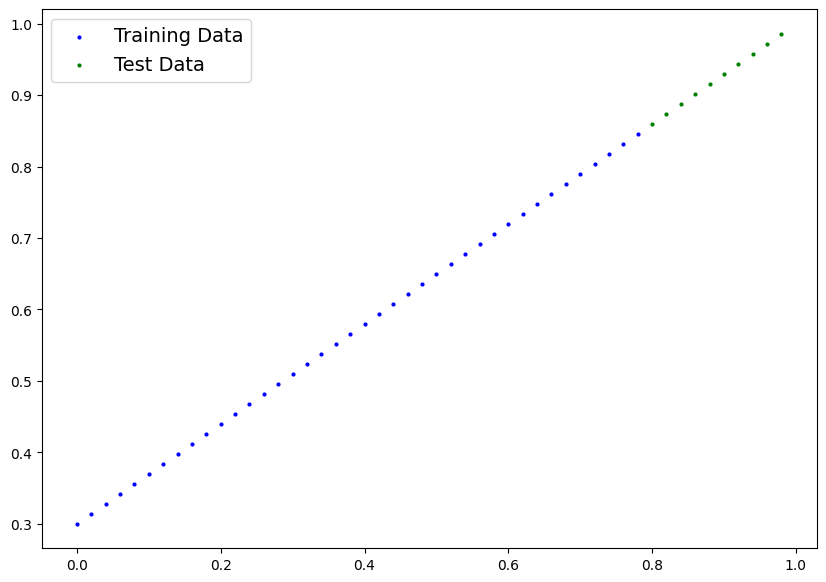

In [ ]:
# plot the data
# note: if plot_predictions function is not loaded ,it will error
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
## 6.2 buildling a pytorch linar model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manul seed
torch.manual_seed(42)

# create an instance of the model
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
#$ check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 training

for training we need:
* loss function
* optimizer
* training loop
* testing loop

In [ ]:
# set up loss function
loss_fn = nn.L1Loss() # same as MAE

# set up optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [ ]:
# training loop
torch.manual_seed(42)
epochs = 500

# put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards ~ backpropgation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # testing loop
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.013014188967645168 | Test Loss: 0.030357254669070244
Epoch: 10 | Loss: 0.01267028134316206 | Test Loss: 0.029529893770813942
Epoch: 20 | Loss: 0.012326832860708237 | Test Loss: 0.028771180659532547
Epoch: 30 | Loss: 0.011983749456703663 | Test Loss: 0.027943814173340797
Epoch: 40 | Loss: 0.01163984090089798 | Test Loss: 0.0271164420992136
Epoch: 50 | Loss: 0.011296573095023632 | Test Loss: 0.026357728987932205
Epoch: 60 | Loss: 0.010953313671052456 | Test Loss: 0.02553037367761135
Epoch: 70 | Loss: 0.010609406046569347 | Test Loss: 0.024703001603484154
Epoch: 80 | Loss: 0.010266316123306751 | Test Loss: 0.023944294080138206
Epoch: 90 | Loss: 0.009922877885401249 | Test Loss: 0.02311692200601101
Epoch: 100 | Loss: 0.009578976780176163 | Test Loss: 0.022289562970399857
Epoch: 110 | Loss: 0.00923605915158987 | Test Loss: 0.02153084985911846
Epoch: 120 | Loss: 0.008892440237104893 | Test Loss: 0.02070348896086216
Epoch: 130 | Loss: 0.00854866299778223 | Test Loss: 0.0199

In [ ]:
model_1.state_dict()



OrderedDict([('linear_layer.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3008], device='cuda:0'))])

In [ ]:
# turn model into eval mode
model_1.eval()

# make predictions on test data

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds


tensor([[0.8607],
        [0.8747],
        [0.8887],
        [0.9027],
        [0.9167],
        [0.9307],
        [0.9447],
        [0.9587],
        [0.9727],
        [0.9867]], device='cuda:0')

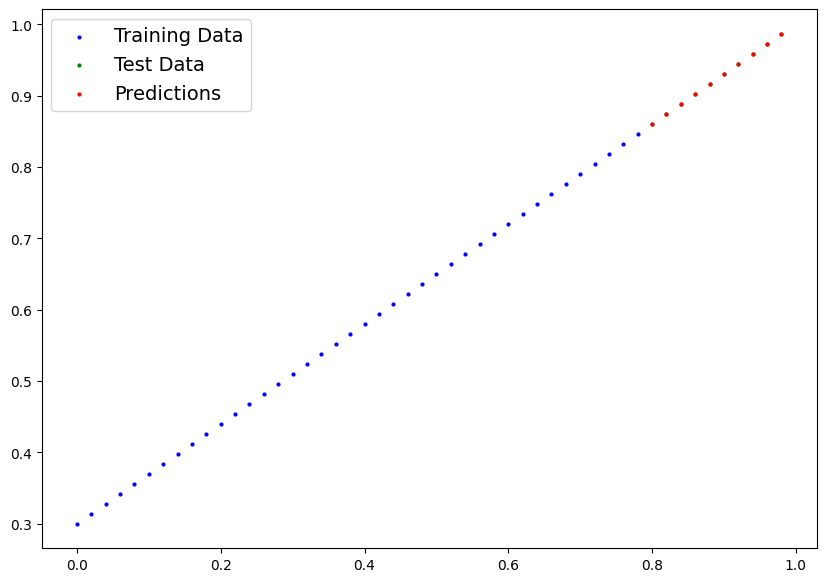

In [ ]:
# check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [ ]:
# 6.5 saving and loading model
from pathlib import Path

# 1. create model directory again

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. creates model save path

MODEL_NAME = "01_pytorch_workflow_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

saving model to: models/01_pytorch_workflow_model_v2.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3008], device='cuda:0'))])

In [ ]:
# load the new model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-87-de4fa82beffc>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6999]])),
             ('linear_layer.bias', tensor([0.3008]))])